<font size="5"><b>Case Study II</b><br><br>
Module 10: Unsupervised Learning
 </font>

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import svm
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import classification_report
#from sklearn.preprocessing import LabelEncoder,StandardScaler
#from scipy import ndimage
from collections import Counter
%matplotlib inline
from sklearn import datasets, svm, metrics
from sklearn.cluster import KMeans
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,9)

In [261]:
img = Image.open('dogs.jpeg')

In [149]:
img.show()

In [262]:
img_array = np.array(img)

In [263]:
img_array.shape

(185, 272, 3)

In [264]:
x,y,z=img_array.shape

In [265]:
image_2d=img_array.reshape(x*y,z)

In [266]:
image_2d

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [267]:
kmean_models = KMeans(n_clusters=3)
kmean_models.fit(image_2d)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [268]:
cluster_center=kmean_model.cluster_centers_

In [269]:
cluster_label= kmean_model.labels_

In [270]:
unique,counts = np.unique(kmean_models.labels_,return_counts=True)

In [271]:
dict(zip(unique,count))

{0: 18293, 1: 19804, 2: 12223}

In [272]:
dataset=pd.DataFrame({'Column1': image_2d[:, 0], 'Column2': image_2d[:, 1] , 'Column3': image_2d[:, 2]})

In [273]:
dataset['cluster']=cluster_label

In [274]:
dataset.head(4)

,Column1,Column2,Column3,cluster
0,240,240,240,1
1,255,255,255,1
2,255,255,255,1
3,251,251,251,1


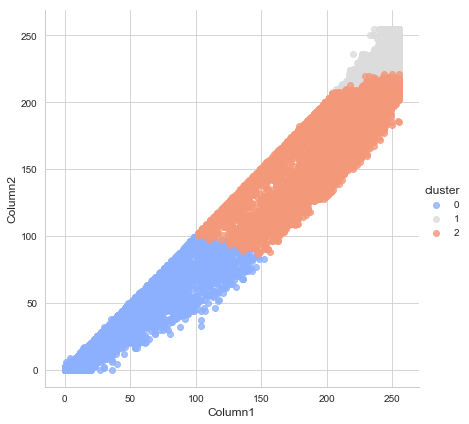

In [275]:
sn.set_style('whitegrid')
sn.lmplot('Column1','Column2',data=dataset,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

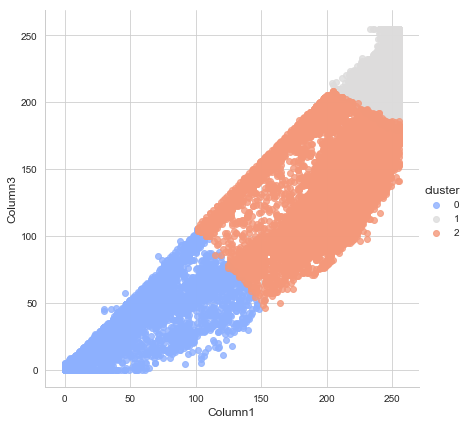

In [276]:
sn.set_style('whitegrid')
sn.lmplot('Column1','Column3',data=dataset,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

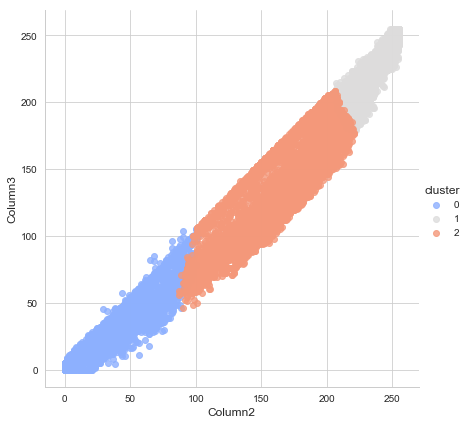

In [277]:
sn.set_style('whitegrid')
sn.lmplot('Column2','Column3',data=dataset,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [278]:
labels = kmean_model.fit_predict(image_2d)

In [279]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [280]:
label_counts = Counter(labels)
label_counts
dominant_color = kmean_model.cluster_centers_[label_counts.most_common(1)[0][0]]
print(dominant_color)

[251.4871407  247.6867877  243.16348966]
